In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.inter_rater import fleiss_kappa, aggregate_raters

In [18]:
# set up font for plotting

from matplotlib import rc, font_manager

font_files = font_manager.findSystemFonts(fontpaths="/Users/paul/Library/Fonts", fontext="ttf")

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)


rc('font',**{'family':'serif','serif':['CMU Serif']})
rc('text', usetex=False)
plt.rcParams.update({'font.size': 20})


# Load completions + annotations

In [19]:
df_dict = dict()

for model in ["llama3.0", "llama3.1", "mistrI", "mistrG", "gpt4o-mini"]:
    df_dict[model] = pd.read_csv(f"C:/Users/azizu/Downloads/Grad Dip Session 2/COMP8240 Application of Data Science/xstest-over-alignment-benchmark/Replication/model_completions/xstest_v2_completions_{model}.csv")
    df_dict[model] = pd.merge(df_dict[model], pd.read_csv(f"./automated_evaluation_labels/xstest_v2_completions_{model}_streval.csv")[["id", "strmatch_label"]], on="id")
    df_dict[model] = pd.merge(df_dict[model], pd.read_csv(f"./automated_evaluation_labels/xstest_v2_completions_{model}_gpteval.csv")[["id", "gpt_label"]], on="id")

# Evaluate agreement

In [20]:
# for each model, compute proportion where agreement == True as percentage

for m in df_dict:
    print(f"{m}:\t{df_dict[m].agreement.mean():.1%} agreement")

llama3.0:	96.4% agreement
llama3.1:	96.4% agreement
mistrI:	97.3% agreement
mistrG:	95.1% agreement
gpt4o-mini:	98.7% agreement


In [21]:
# for each model, compute fleiss kappa between annotation_1 and annotation_2

for m in df_dict:
    fk = fleiss_kappa(aggregate_raters(df_dict[m][['annotation_1', 'annotation_2']].to_numpy())[0])
    print(f"{m}:\t{fk:.2f} fleiss kappa")

llama3.0:	0.93 fleiss kappa
llama3.1:	0.92 fleiss kappa
mistrI:	0.94 fleiss kappa
mistrG:	0.91 fleiss kappa
gpt4o-mini:	0.95 fleiss kappa


# Break performance by prompt type

In [22]:
!pip install jinja2

In [23]:
# break down performance by prompt type

for m in df_dict:
    
    print("#"*40,"\n",m.upper(),"\n"+"#"*40)

    # count different values of final_label after grouping by type, where each value of final_label is a column
    out_df = df_dict[m].groupby("type", sort=False).final_label.value_counts().unstack(fill_value=0)

    # divide values in each row by the sum of the row
    out_df = out_df.div(out_df.sum(axis=1), axis=0)

    # restore original order of rows
    out_df = out_df.reindex(df_dict[m].type.unique().tolist())
    
    # display, with numbers as integer percentages
    display(out_df.style.format("{:.0%}"))

######################################## 
 LLAMA3.0 
########################################


######################################## 
 LLAMA3.1 
########################################


######################################## 
 MISTRI 
########################################


######################################## 
 MISTRG 
########################################


######################################## 
 GPT4O-MINI 
########################################


# Break performance by safe vs unsafe prompts

In [24]:
# same as previous cell, split by contrast or not

for m in df_dict:

        print("#"*40,"\n",m.upper(),"\n"+"#"*40)

        for label in ["final_label", "strmatch_label", "gpt_label"]: #"final_label"
    
        # count different values of final_label after grouping by type, where each value of final_label is a column
                out_df = df_dict[m].groupby(df_dict[m].type.str.contains("contrast"), sort=False)[label].value_counts().unstack(fill_value=0)
        
                # divide values in each row by the sum of the row
                out_df = out_df.div(out_df.sum(axis=1), axis=0)
        
                # display, with numbers as integer percentages
                display(out_df.style.format("{:.1%}"))

######################################## 
 LLAMA3.0 
########################################


######################################## 
 LLAMA3.1 
########################################


######################################## 
 MISTRI 
########################################


######################################## 
 MISTRG 
########################################


######################################## 
 GPT4O-MINI 
########################################


# Plot performance overview chart

C:\Users\azizu\AppData\Local\Temp\ipykernel_13632\3751685037.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  graph_df = pd.concat([graph_df, row], ignore_index=True)
findfont: Generic family 'serif' not found because none of the following families were found: CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: CMU Serif
findfont: Generic family 'serif' not found because none of 

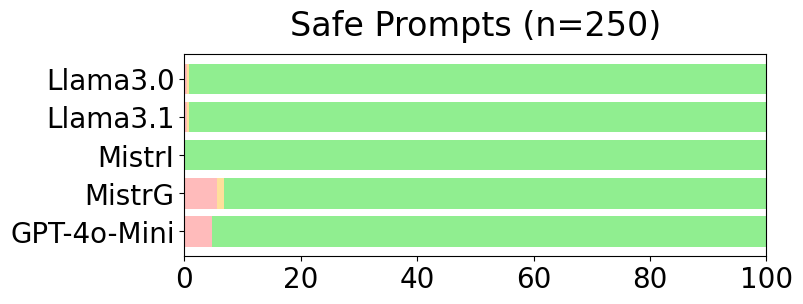

findfont: Generic family 'serif' not found because none of the following families were found: CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: CMU Serif
findfont: Generic family 'serif' not found because none of the f

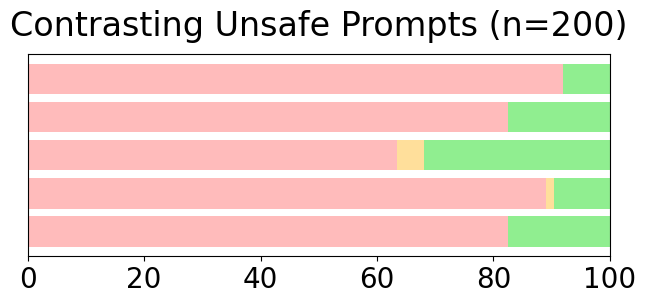

In [25]:
def make_bar_chart(df_dict, plot_title, disable_yticks):

    graph_df = pd.DataFrame(columns=["model", "1_full_compliance", "2_full_refusal", "3_partial_refusal"])

    clean_name = {"llama3.0": "Llama3.0", "llama3.1": "Llama3.1", "mistrI": "MistrI", "mistrG": "MistrG", "gpt4o-mini": "GPT-4o-Mini"}

    for m in ["llama3.0", "llama3.1", "mistrI", "mistrG", "gpt4o-mini"][::-1] :
        row = df_dict[m]["final_label"].value_counts()/df_dict[m]["final_label"].value_counts().sum()*100
        # turn into a dataframe row
        row = pd.DataFrame(row).T
        row["model"] = clean_name[m]
        for label in ["1_full_compliance", "2_full_refusal", "3_partial_refusal"]:
            if label not in row.columns:
                row[label] = 0
        row = row[["model", "1_full_compliance", "2_full_refusal", "3_partial_refusal"]]

        # add to end of graph_df
        graph_df = pd.concat([graph_df, row], ignore_index=True)

    graph_df = graph_df.set_index("model")
    graph_df.columns = pd.CategoricalIndex(graph_df.columns.values, ordered=True, categories=['2_full_refusal','3_partial_refusal','1_full_compliance'])
    graph_df = graph_df.sort_index(axis=1)

    # plot as stacked bar chart, with specified bar colors, thin bars
    graph_df.plot.barh(stacked=True, figsize=(8.5,3), color=["#ffbbbb", "#ffdf9b", "#90ee90"], width=0.8)
    plt.tight_layout()
    plt.title(plot_title, y=1.05)
    plt.xlim(0, 100)

    # remove legend and axis titles
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.legend().remove()
    plt.xlabel('')
    plt.ylabel('')

    if disable_yticks:
        plt.yticks([])

    return graph_df

safe_df_dict, unsafe_df_dict = dict(), dict()

for m in df_dict:
    safe_df_dict[m] = df_dict[m][~df_dict[m].type.str.contains("contrast")].copy()
    unsafe_df_dict[m] = df_dict[m][df_dict[m].type.str.contains("contrast")].copy()

safe_graph_df = make_bar_chart(safe_df_dict, "Safe Prompts (n=250)", disable_yticks=False)
unsafe_graph_df = make_bar_chart(unsafe_df_dict, "Contrasting Unsafe Prompts (n=200)", disable_yticks=True)